Now let's write a finction that calculates Multivariate Gaussian Distribution

# Anomaly Detection<br>
Welocme back to the the final assignment congrats we have made it look at you with this much knowledge<br>
In this part of the assignment, we will implement an anomaly detection algorithm using the Gaussian model to detect anomalous behavior in a 2D dataset first and then a high-dimensional dataset<br>
Now let's dive into the last assignment as usual load our needed packages, data and plot it

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

mat = loadmat("./Data/ex8data1.mat")
X = mat["X"]
Xval = mat["Xval"]
yval = mat["yval"]

Text(0, 0.5, 'Throughput (mb/s)')

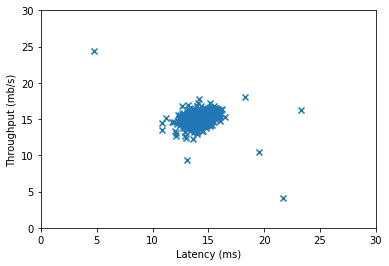

In [3]:
plt.scatter(X[:,0], X[:,1], marker="x")
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

Now we need to estimate the mean and the varaince for our Gaussian distribution model<br>
Let's write a function to do this<br>
Input: X -> features<br>

Output: mean ->  mean of our features<br>
&emsp; &emsp; &emsp; &ensp; varaince -> the varaince of our features

In [6]:
def estimateGaussian(X):
    m = X.shape[0]

    _sum = np.sum(X, axis = 0)
    mean = 1/m * _sum

    varaince = 1/m * np.sum((X-mean)**2, axis=0)
    return mean, varaince

In [7]:
mean, varaince = estimateGaussian(X)

In [8]:
def multivariateGaussian(X, mu, sigma2):
    k = len(mu)    
    sigma2 = np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X, axis=1))
    return p

In [10]:
p = multivariateGaussian(X, mean, varaince)

Text(0, 0.5, 'Throughput (mb/s)')

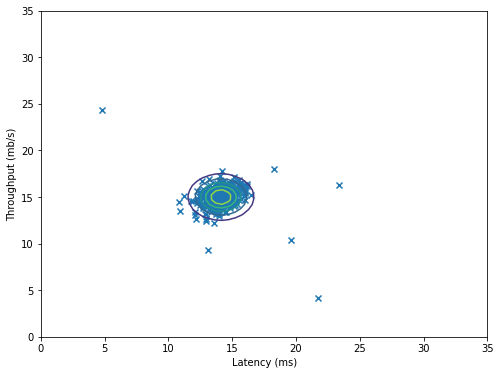

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mean, varaince)
contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),6)
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

In [28]:
def selectThreshold(yval, pval):
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

In [29]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 8.990852779269495e-05
Best F1 on Cross Validation Set: 0.8750000000000001


Text(0, 0.5, 'Throughput (mb/s)')

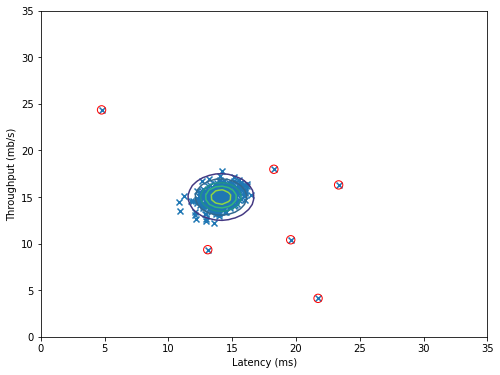

In [31]:
plt.figure(figsize=(8,6))

# plot the data
plt.scatter(X[:,0],X[:,1],marker="x")

# potting of contour
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),7)

# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker ="o",facecolor="none",edgecolor="r",s=70)

plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

In [33]:
mat2 = loadmat("./Data/ex8data2.mat")
X2 = mat2["X"]
Xval2 = mat2["Xval"]
yval2 = mat2["yval"]

In [34]:
mu2, sigma2_2 = estimateGaussian(X2)

In [35]:
# Training set
p3 = multivariateGaussian(X2, mu2, sigma2_2)

# cross-validation set
pval2 = multivariateGaussian(Xval2, mu2, sigma2_2)

# Find the best threshold
epsilon2, F1_2 = selectThreshold(yval2, pval2)
print("Best epsilon found using cross-validation:",epsilon2)
print("Best F1 on Cross Validation Set:",F1_2)
print("# Outliers found:",np.sum(p3<epsilon2))

Best epsilon found using cross-validation: 1.3772288907613575e-18
Best F1 on Cross Validation Set: 0.6153846153846154
# Outliers found: 117


# Recommender Systems

In [36]:
mat3 = loadmat("./Data/ex8_movies.mat")
mat4 = loadmat("./Data/ex8_movieParams.mat")
Y = mat3["Y"] 
R = mat3["R"]
X = mat4["X"]
Theta = mat4["Theta"]

In [37]:
print("Average rating for movie 1 (Toy Story):",np.sum(Y[0,:]*R[0,:])/np.sum(R[0,:]),"/5")

Average rating for movie 1 (Toy Story): 3.8783185840707963 /5


Text(0, 0.5, 'Movies')

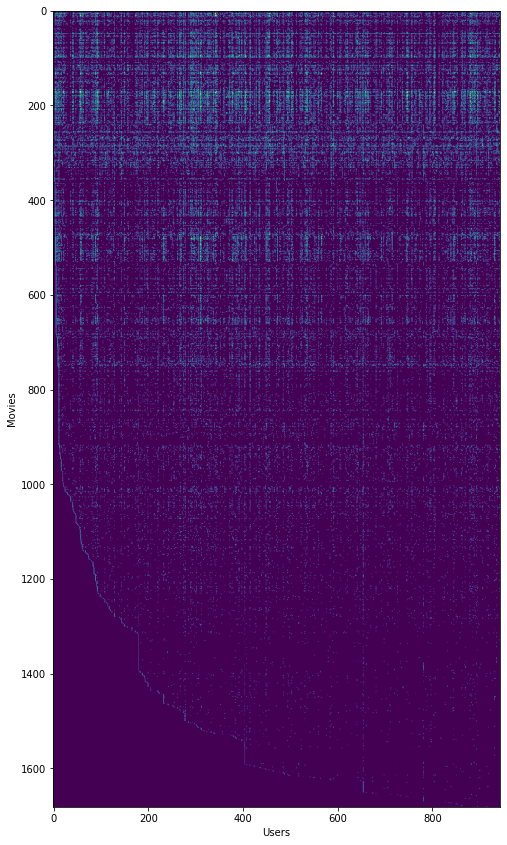

In [38]:
plt.figure(figsize=(8,16))
plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Movies")

In [39]:
def  cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
    """
    Returns the cost and gradient for the collaborative filtering problem
    """
    
    # Unfold the params
    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions =  X @ Theta.T
    err = (predictions - Y)
    J = 1/2 * np.sum((err**2) * R)
    
    #compute regularized cost function
    reg_X =  Lambda/2 * np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J + reg_X + reg_Theta
    
    # Compute gradient
    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(),Theta_grad.flatten())
    
    # Compute regularized gradient
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    
    return J, grad, reg_J, reg_grad

In [40]:
# Reduce the data set size to run faster
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
Theta_test= Theta[:num_users,:num_features]
Y_test = Y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),Theta_test.flatten())

# Evaluate cost function
J, grad = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 0)[:2]
print("Cost at loaded parameters:",J)

J2, grad2 = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[2:]
print("Cost at loaded parameters (lambda = 1.5):",J2)

Cost at loaded parameters: 22.224603725685675
Cost at loaded parameters (lambda = 1.5): 31.34405624427422


In [55]:
# load movie list
movieList = open("./Data/movie_ids.txt", "r", encoding ="ISO-8859-1").read().split("\n")[:-1]
movieList

ons (1994)',
 "381 Muriel's Wedding (1994)",
 '382 Adventures of Priscilla, Queen of the Desert, The (1994)',
 '383 Flintstones, The (1994)',
 '384 Naked Gun 33 1/3: The Final Insult (1994)',
 '385 True Lies (1994)',
 '386 Addams Family Values (1993)',
 '387 Age of Innocence, The (1993)',
 '388 Beverly Hills Cop III (1994)',
 '389 Black Beauty (1994)',
 '390 Fear of a Black Hat (1993)',
 '391 Last Action Hero (1993)',
 '392 Man Without a Face, The (1993)',
 '393 Mrs. Doubtfire (1993)',
 '394 Radioland Murders (1994)',
 '395 Robin Hood: Men in Tights (1993)',
 '396 Serial Mom (1994)',
 '397 Striking Distance (1993)',
 '398 Super Mario Bros. (1993)',
 '399 Three Musketeers, The (1993)',
 '400 Little Rascals, The (1994)',
 '401 Brady Bunch Movie, The (1995)',
 '402 Ghost (1990)',
 '403 Batman (1989)',
 '404 Pinocchio (1940)',
 '405 Mission: Impossible (1996)',
 '406 Thinner (1996)',
 '407 Spy Hard (1996)',
 '408 Close Shave, A (1995)',
 '409 Jack (1996)',
 '410 Kingpin (1996)',
 '411 Nutt

In [56]:
# Initialize my ratings
my_ratings = np.zeros((1682,1))

# Create own ratings
my_ratings[0] = 4 
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5

print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for index",movieList[i])

New user ratings:

Rated 4 for index 1 Toy Story (1995)
Rated 3 for index 7 Twelve Monkeys (1995)
Rated 5 for index 12 Usual Suspects, The (1995)
Rated 4 for index 54 Outbreak (1995)
Rated 5 for index 64 Shawshank Redemption, The (1994)
Rated 3 for index 66 While You Were Sleeping (1995)
Rated 5 for index 69 Forrest Gump (1994)
Rated 4 for index 83 Much Ado About Nothing (1993)
Rated 2 for index 98 Silence of the Lambs, The (1991)
Rated 5 for index 226 Die Hard 2 (1990)
Rated 5 for index 355 Sphere (1998)


In [57]:
def normalizeRatings(Y, R):
    """
    normalized Y so that each movie has a rating of 0 on average, and returns the mean rating in Ymean.
    """
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean

In [58]:
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):
    """
    Optimize X and Theta
    """
    # unfold the parameters
    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    
    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        # unfold grad
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history

In [59]:
Y = np.hstack((my_ratings,Y))
R = np.hstack((my_ratings!=0,R))

# Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)

In [60]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

# Set initial Parameters (Theta,X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10

# Optimize parameters using Gradient Descent
paramsFinal, J_history = gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,0.001,400,Lambda)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

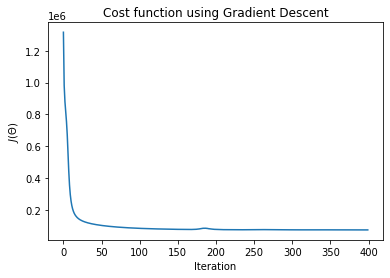

In [61]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [62]:
# unfold paramaters
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)

# Predict rating
p = X @ Theta.T
my_predictions = p[:,0][:,np.newaxis] + Ymean

In [63]:
df = pd.DataFrame(np.hstack((my_predictions,np.array(movieList)[:,np.newaxis])))
df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)

In [64]:
print("Top recommendations for you:\n")
for i in range(10):
    print("Predicting rating",round(float(df[0][i]),1)," for index",df[1][i])

Top recommendations for you:

Predicting rating 8.4  for index 64 Shawshank Redemption, The (1994)
Predicting rating 8.3  for index 174 Raiders of the Lost Ark (1981)
Predicting rating 8.3  for index 318 Schindler's List (1993)
Predicting rating 8.2  for index 313 Titanic (1997)
Predicting rating 8.1  for index 12 Usual Suspects, The (1995)
Predicting rating 8.1  for index 408 Close Shave, A (1995)
Predicting rating 8.1  for index 169 Wrong Trousers, The (1993)
Predicting rating 8.1  for index 272 Good Will Hunting (1997)
Predicting rating 8.1  for index 172 Empire Strikes Back, The (1980)
Predicting rating 8.0  for index 22 Braveheart (1995)
